# Overfitting

During graduate school we covered overfitting quite a bit. There would always be some question or assignment that would have us overfit and then try and resolve it. We would overfit a binary tree and then we would have to trim. Neural networks are VERY prone to overfitting so you always needed to check your training and validating results to determine when it was time to stop training.  

This [tutorial](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit) should be mostly review but there are certain parts of the TensorFlow framework I haven't worked with so it should be well worth my time.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

**IMDB Dataset**  
We will once again use the IMDB dataset but this time we are going to do a some tricks to make it overfit. We will multi-hot encode the sentences.  
  
Multi-hot encoding means turning them into vectors of 1s and 0s.

In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension)) #Create a 0 vector
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # Only set the correct vector to 1
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

**Resulting Vector**  
Here is one of the multi-hot encoded vectors

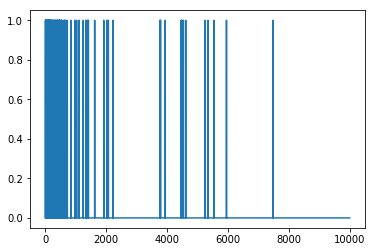

In [4]:
plt.plot(train_data[0])
plt.show()

**Overfitting**  
If you remember, neural networks are function approximations and the larger the network the complex each function can get. This leads to the network learning the training data PERFECTLY. The simplest way to fix this is to reduce the complexity. This can be reducing layers or neurons. But, very small networks make it very hard to learn your data at all. You will need to find a balance.

**Best Practice Solution**  
There is no magic formula. The more you get into ML you will start to see that it is more *art* than *science*. There will be many situations where you just have to get a feel for what is happening and adjust.  

It is best to start with few layers and then increase from there.

**Baseline MOdel**  
Here we will create a baseline and then build from it.

In [7]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                     validation_data=(test_data,test_labels),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.4837 - acc: 0.8042 - binary_crossentropy: 0.4837 - val_loss: 0.3265 - val_acc: 0.8776 - val_binary_crossentropy: 0.3265
Epoch 2/20
 - 4s - loss: 0.2411 - acc: 0.9113 - binary_crossentropy: 0.2411 - val_loss: 0.2826 - val_acc: 0.8868 - val_binary_crossentropy: 0.2826
Epoch 3/20
 - 4s - loss: 0.1745 - acc: 0.9391 - binary_crossentropy: 0.1745 - val_loss: 0.2940 - val_acc: 0.8841 - val_binary_crossentropy: 0.2940
Epoch 4/20
 - 4s - loss: 0.1386 - acc: 0.9526 - binary_crossentropy: 0.1386 - val_loss: 0.3234 - val_acc: 0.8780 - val_binary_crossentropy: 0.3234
Epoch 5/20
 - 4s - loss: 0.1151 - acc: 0.9614 - binary_crossentropy: 0.1151 - val_loss: 0.3530 - val_acc: 0.8717 - val_binary_crossentropy: 0.3530
Epoch 6/20
 - 4s - loss: 0.0942 - acc: 0.9704 - binary_crossentropy: 0.0942 - val_loss: 0.3884 - val_acc: 0.8686 - val_binary_crossentropy: 0.3884
Epoch 7/20
 - 4s - loss: 0.0769 - acc: 0.9780 - binary_crossentropy:

**Smaller Model**  
We are going to create a smaller model with less hidden nodes to compare against the baseline

In [11]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [12]:
smaller_history = smaller_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                     validation_data=(test_data,test_labels),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6442 - acc: 0.6100 - binary_crossentropy: 0.6442 - val_loss: 0.5865 - val_acc: 0.7199 - val_binary_crossentropy: 0.5865
Epoch 2/20
 - 4s - loss: 0.5306 - acc: 0.7941 - binary_crossentropy: 0.5306 - val_loss: 0.5158 - val_acc: 0.8029 - val_binary_crossentropy: 0.5158
Epoch 3/20
 - 4s - loss: 0.4661 - acc: 0.8683 - binary_crossentropy: 0.4661 - val_loss: 0.4783 - val_acc: 0.8500 - val_binary_crossentropy: 0.4783
Epoch 4/20
 - 4s - loss: 0.4244 - acc: 0.9012 - binary_crossentropy: 0.4244 - val_loss: 0.4564 - val_acc: 0.8716 - val_binary_crossentropy: 0.4564
Epoch 5/20
 - 4s - loss: 0.3934 - acc: 0.9202 - binary_crossentropy: 0.3934 - val_loss: 0.4423 - val_acc: 0.8796 - val_binary_crossentropy: 0.4423
Epoch 6/20
 - 4s - loss: 0.3675 - acc: 0.9343 - binary_crossentropy: 0.3675 - val_loss: 0.4384 - val_acc: 0.8697 - val_binary_crossentropy: 0.4384
Epoch 7/20
 - 4s - loss: 0.3447 - acc: 0.9446 - binary_crossentropy:

**Bigger Model**

In [14]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
bigger_history = bigger_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                     validation_data=(test_data,test_labels),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 12s - loss: 0.3538 - acc: 0.8482 - binary_crossentropy: 0.3538 - val_loss: 0.2946 - val_acc: 0.8808 - val_binary_crossentropy: 0.2946
Epoch 2/20
 - 11s - loss: 0.1440 - acc: 0.9479 - binary_crossentropy: 0.1440 - val_loss: 0.3544 - val_acc: 0.8642 - val_binary_crossentropy: 0.3544
Epoch 3/20
 - 11s - loss: 0.0543 - acc: 0.9841 - binary_crossentropy: 0.0543 - val_loss: 0.4204 - val_acc: 0.8689 - val_binary_crossentropy: 0.4204
Epoch 4/20
 - 11s - loss: 0.0094 - acc: 0.9986 - binary_crossentropy: 0.0094 - val_loss: 0.5733 - val_acc: 0.8692 - val_binary_crossentropy: 0.5733
Epoch 5/20
 - 11s - loss: 0.0011 - acc: 1.0000 - binary_crossentropy: 0.0011 - val_loss: 0.6680 - val_acc: 0.8694 - val_binary_crossentropy: 0.6680
Epoch 6/20
 - 11s - loss: 2.6108e-04 - acc: 1.0000 - binary_crossentropy: 2.6108e-04 - val_loss: 0.7132 - val_acc: 0.8704 - val_binary_crossentropy: 0.7132
Epoch 7/20
 - 11s - loss: 1.5283e-04 - acc: 1.0000 - b

**Plotting the training and validation loss**  
We will now plot the loss for both the training and validation loss. Remember, the lower the loss the better the model.  

**Displaying Overfitting**  
When you see the training loss go DOWN while the validation loss goes UP you have hit the point of overfitting. This is showing you that your model is starting to train to your exact training data and isn't generalizing any more.  

The smaller network begins to overfit later than the baseline model (6 epochs vs 4 epochs) and its performance degrades much more slowly. I have added red verticle lines to show the overfitting.

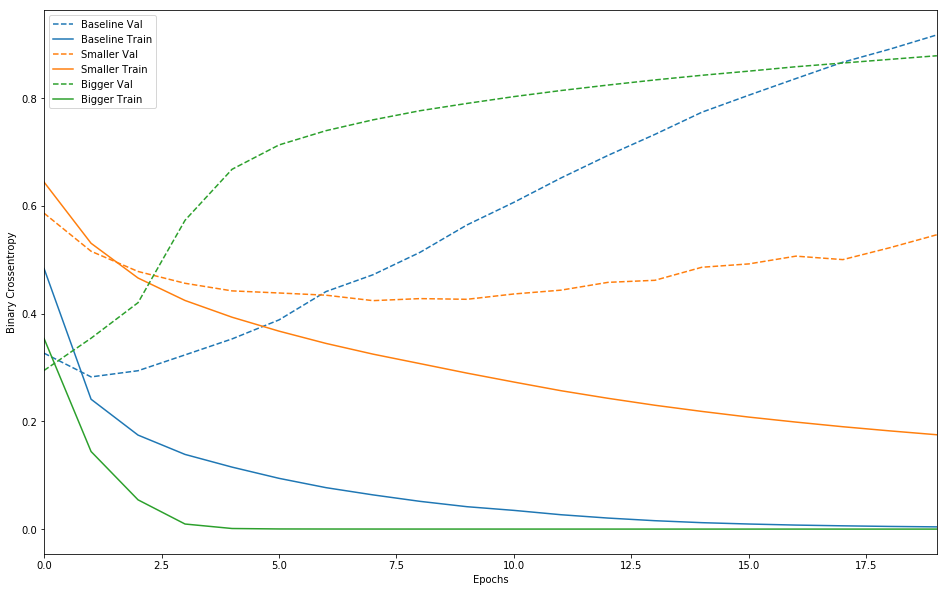

In [25]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])
    plt.show()
    
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

**Graph Results**  
I attempted to put in red vertical lines to show over fitting but they didn't line up correctly. The large (green) overfits almost the instance it starts. You can see the dotted line incrase from the start. the baseline (blue) takes just a little bit longer but you can see the dotten line start to spike by the second epoch. The tutorial says it is at the 4th epoch but that seems a little late to me. The small (yellow) start to overfit almost exactly at 6 epochs. At that point you see the dotted line start to increase.

## Strategies

**Weight Regularization**  
I have never done this before so I was right that I would learn something. With a densely connected graph there are multiple sets of weights that could explain your data. This will make the network use the simpler models.  

Since I can't explain it any better than the tutorial here is what it says:  

*A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights.*
This cost comes in two flavors. L1 regularization and L2 regularization. L1 is added proportional to the absolute value of the weights. L2 is added proportional to the square of the value of the weights.  

This is done in the following code by passing the *kernal_regularizer* parameter. The (0.001) means that every coefficient in the weight matrix of the layer will add 0.001 + weight_coefficient_value**2.

In [22]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, 
                                validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5141 - acc: 0.8098 - binary_crossentropy: 0.4726 - val_loss: 0.3631 - val_acc: 0.8808 - val_binary_crossentropy: 0.3192
Epoch 2/20
 - 4s - loss: 0.2909 - acc: 0.9136 - binary_crossentropy: 0.2435 - val_loss: 0.3337 - val_acc: 0.8878 - val_binary_crossentropy: 0.2838
Epoch 3/20
 - 4s - loss: 0.2450 - acc: 0.9329 - binary_crossentropy: 0.1932 - val_loss: 0.3402 - val_acc: 0.8842 - val_binary_crossentropy: 0.2867
Epoch 4/20
 - 4s - loss: 0.2213 - acc: 0.9431 - binary_crossentropy: 0.1664 - val_loss: 0.3554 - val_acc: 0.8798 - val_binary_crossentropy: 0.2996
Epoch 5/20
 - 4s - loss: 0.2094 - acc: 0.9489 - binary_crossentropy: 0.1521 - val_loss: 0.3673 - val_acc: 0.8783 - val_binary_crossentropy: 0.3091
Epoch 6/20
 - 4s - loss: 0.1967 - acc: 0.9535 - binary_crossentropy: 0.1380 - val_loss: 0.3828 - val_acc: 0.8740 - val_binary_crossentropy: 0.3237
Epoch 7/20
 - 4s - loss: 0.1899 - acc: 0.9567 - binary_crossentropy:

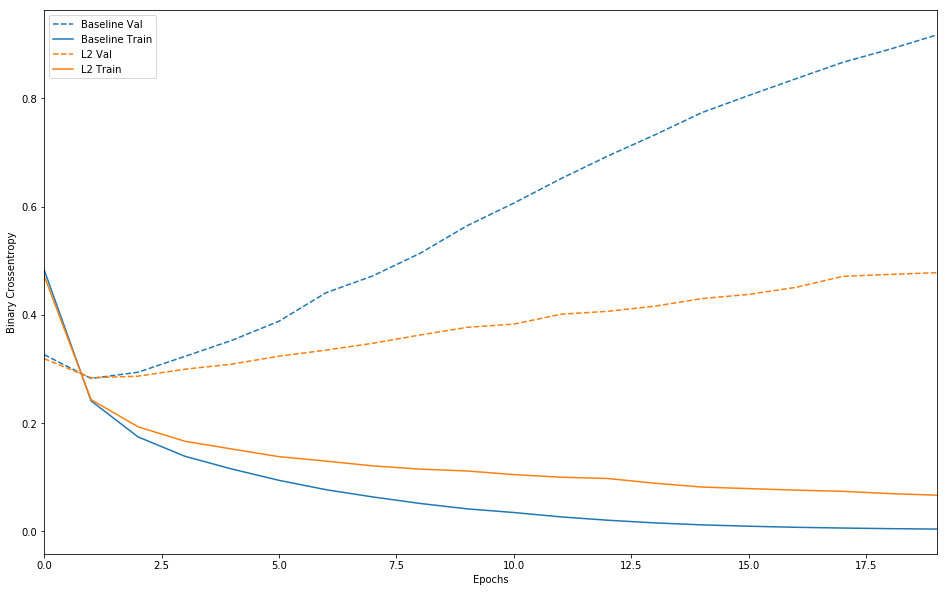

In [26]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

**Graph Results**  
As you can see the L2 (yellow) is much more resistant to overfitting even though they have the same layers and nodes.

**Add Dropout**  
Adding dropout is one of the most effective and most commonly used regularization techniques. It was developed by Hinton and his students at the University of Toronot. The design is that it will randomly drop out (set to 0) a number of output features of the layer during training. The *dropout rate* is the fraction of the weights that are being 0'ed out. Typically, it is set between 0.2 and 0.5.  

In code, this is done by adding a dropout layer.

In [27]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                  validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6495 - acc: 0.6155 - binary_crossentropy: 0.6495 - val_loss: 0.5552 - val_acc: 0.8048 - val_binary_crossentropy: 0.5552
Epoch 2/20
 - 5s - loss: 0.5047 - acc: 0.7768 - binary_crossentropy: 0.5047 - val_loss: 0.3816 - val_acc: 0.8755 - val_binary_crossentropy: 0.3816
Epoch 3/20
 - 4s - loss: 0.3858 - acc: 0.8526 - binary_crossentropy: 0.3858 - val_loss: 0.3059 - val_acc: 0.8848 - val_binary_crossentropy: 0.3059
Epoch 4/20
 - 4s - loss: 0.3206 - acc: 0.8902 - binary_crossentropy: 0.3206 - val_loss: 0.2814 - val_acc: 0.8885 - val_binary_crossentropy: 0.2814
Epoch 5/20
 - 5s - loss: 0.2661 - acc: 0.9124 - binary_crossentropy: 0.2661 - val_loss: 0.2774 - val_acc: 0.8896 - val_binary_crossentropy: 0.2774
Epoch 6/20
 - 5s - loss: 0.2328 - acc: 0.9240 - binary_crossentropy: 0.2328 - val_loss: 0.2836 - val_acc: 0.8876 - val_binary_crossentropy: 0.2836
Epoch 7/20
 - 4s - loss: 0.2021 - acc: 0.9338 - binary_crossentropy:

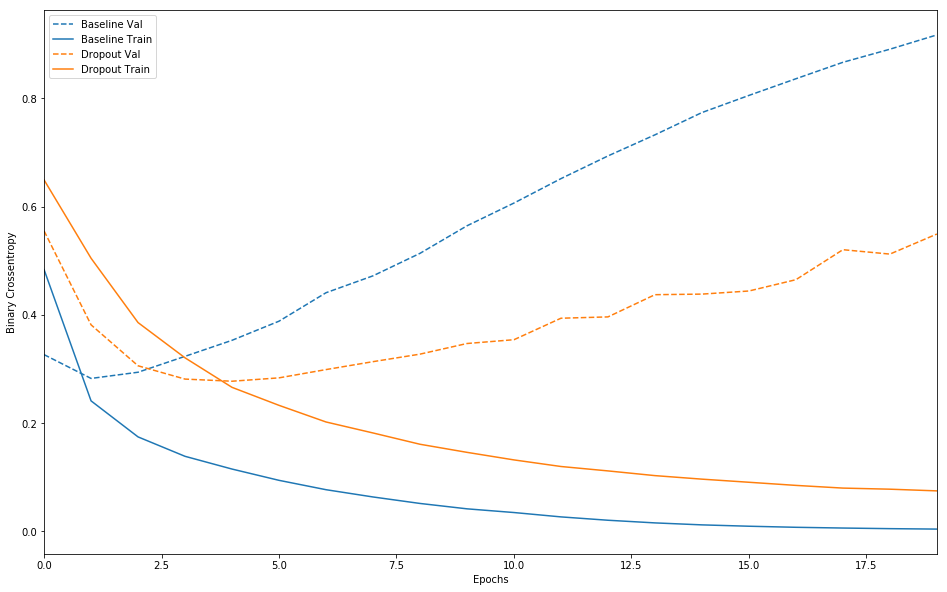

In [28]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

**Results**  
It is clear to see that adding a dropout was an improvement.

**Summary**  
During this tutorial we have shown 4 ways to prevent overfitting.
* Get more training data
* Reduce the complexity of your network
* Add weight regularization  
* Add dropout

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.